In [1]:
# chapter1

In [6]:
!pip install statsmodels

     |████████████████████████████████| 9.6 MB 224 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 11.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [7]:
import numpy as np 
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [10]:
beer = pd.read_csv('sample/5-1-1-beer.csv')
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


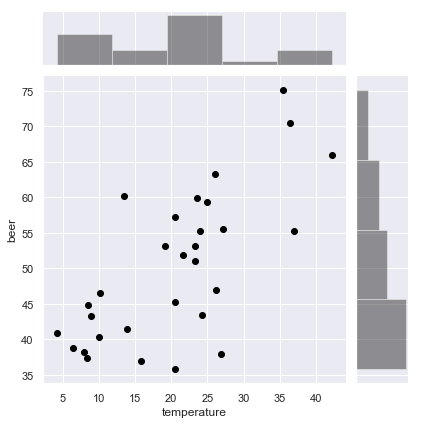

In [11]:
sns.jointplot(x='temperature',y='beer',data=beer,color='black')

In [12]:
lm_model = smf.ols(formula = 'beer ~ temperature', data=beer).fit()

In [13]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.11e-05
Time:                        16:04:44   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                nan
Time:                        16:07:52   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
aic = -2*(lm_model.llf-(lm_model.df_model+1))

In [29]:
aic

208.90902935575437

In [30]:
lm_model.aic

208.90902935575437

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


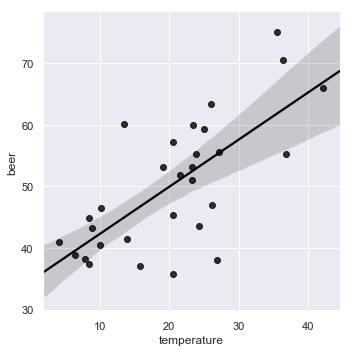

In [31]:
sns.lmplot(x='temperature', y='beer', data=beer, scatter_kws={'color':'black'}, line_kws={'color':'black'})

In [32]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [34]:
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [35]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [36]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [37]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.91876701095054

In [38]:
resid = lm_model.resid

In [39]:
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [40]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [41]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [42]:
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()
sp.sum((yhat-mu)**2)/sp.sum((y-mu)**2)

0.503959323061187

In [43]:
lm_model.rsquared

0.5039593230611856

In [44]:
sp.sum((yhat-mu)**2) + sum(resid**2)

3277.114666666669

In [45]:
sp.sum((y-mu)**2)

3277.1146666666655

In [46]:
1-sp.sum(resid**2)/sp.sum((y-mu)**2)

0.5039593230611857

In [47]:
n = len(beer.beer)
s = 1
1 - ((sp.sum(resid**2)/(n-s-1)) / (sp.sum((y-mu)**2)/(n-1)))

0.48624358459908523

In [49]:
lm_model.rsquared_adj

0.4862435845990851

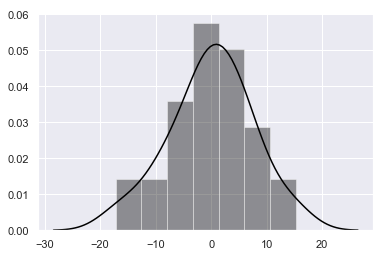

In [50]:
sns.distplot(resid, color='black')

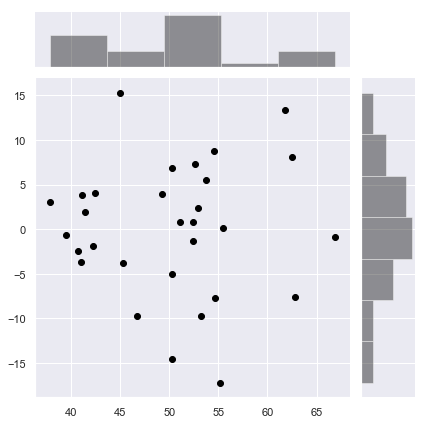

In [53]:
sns.jointplot(lm_model.fittedvalues, resid, joint_kws={'color':'black'}, marginal_kws={'color': 'black'})

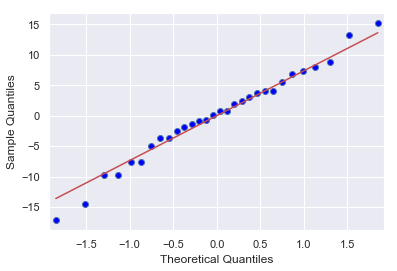

In [54]:
fig = sm.qqplot(resid, line='s')

In [55]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [56]:
1/31

0.032

In [58]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs+1)/(nobs+1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [62]:
ppf = stats.norm.ppf(cdf) # 標準正規分布
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

In [63]:
help(stats.norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



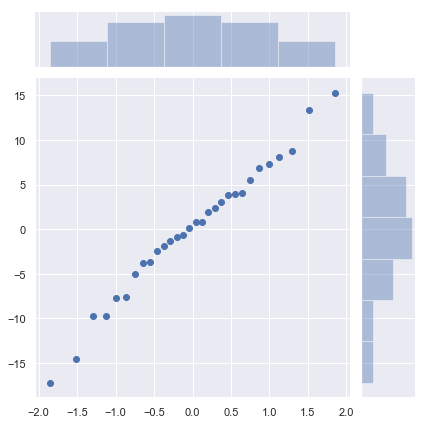

In [74]:
sns.jointplot(ppf,resid_sort,)